In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit.library import QFT
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit import *
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import product

pi=np.pi

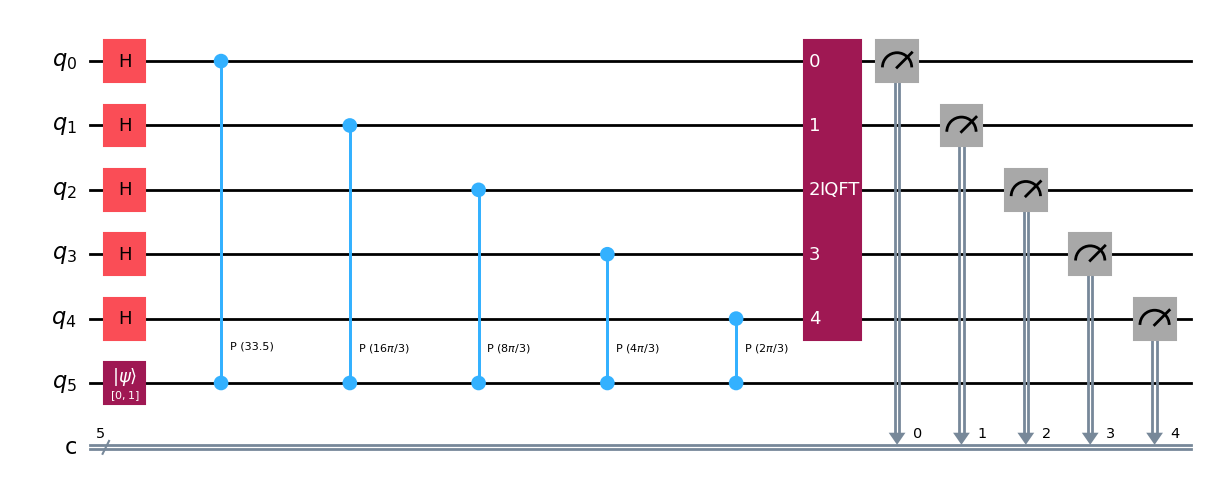

In [2]:
c=5
n=1
qc=QuantumCircuit(c+n,c)

for qubit in range(c):
    qc.h(qubit)
    
init_st=[0, 1]
qc.initialize(init_st,c+n-1)

theta=1/3

for x in range(c):
    exponent=2**(c-x-1)
    qc.cp(2*pi*theta*exponent, x, c+n-1)

    
qc.append(QFT(c).inverse(), range(c))

for i in range(c):
    qc.measure(i,i)
    
#qc.measure(range(c), range(c))
    
qc.draw('mpl')

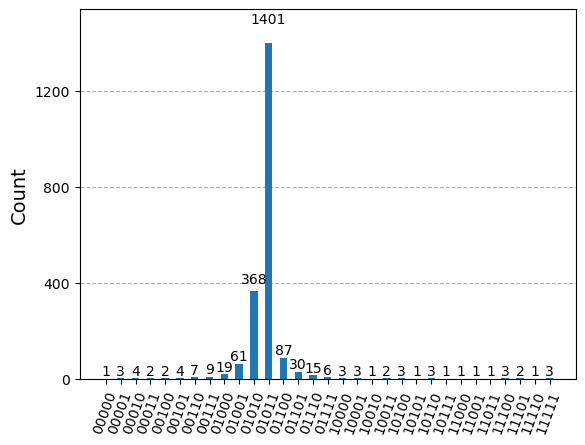

In [3]:
# Use AerSimulator backend (which supports BackendV2)
backend = Aer.get_backend('aer_simulator')
shots = 2048

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, backend)

# Run the transpiled circuit directly using the backend's run method with shots specified
results = backend.run(transpiled_qc, shots=shots).result()

# Get the result counts
answer = results.get_counts()

# Plot the histogram of the results
plot_histogram(answer)

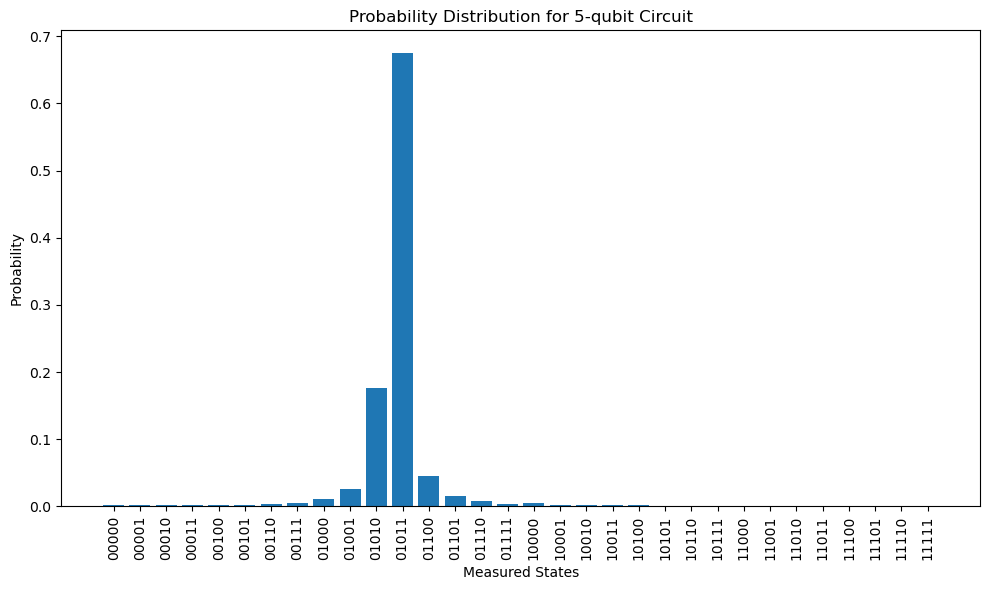

State with the highest probability: 01011
Probability: 0.675
Using 5 qubits with theta =  0.3333333333333333 , measured_theta =  0.34375


In [4]:
simulator = Aer.get_backend('qasm_simulator')
#job_sim = execute(qc, simulator, shots=10000)


# Transpile the quantum circuit for the target backend
transpiled_qc = transpile(qc, backend=simulator)

# Execute the transpiled circuit on the backend
job_sim = simulator.run(transpiled_qc, shots=10000)

# Get the result from the simulator
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

# Create a list of all possible c-qubit binary strings
all_states = [''.join(map(str, state)) for state in product([0, 1], repeat=c)]

# Initialize probabilities for all states
probabilities = {state: counts.get(state, 0) / 10000 for state in all_states}

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.bar(probabilities.keys(), probabilities.values())
plt.xlabel('Measured States')
plt.ylabel('Probability')
plt.title('Probability Distribution for 5-qubit Circuit')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


max_probability_state = max(probabilities, key=probabilities.get)
max_probability = probabilities[max_probability_state]

print("State with the highest probability:", max_probability_state)
print("Probability:", max_probability)


measured_theta = int(max_probability_state, 2)/(2**c)
print("Using",c,"qubits with theta = ",theta,", measured_theta = ", measured_theta)